In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Classified Data", index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [12]:
df_feat= pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [19]:
from sklearn.model_selection import train_test_split

In [18]:
x=df_feat
y=df["TARGET CLASS"]

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
pred=knn.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [46]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [49]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

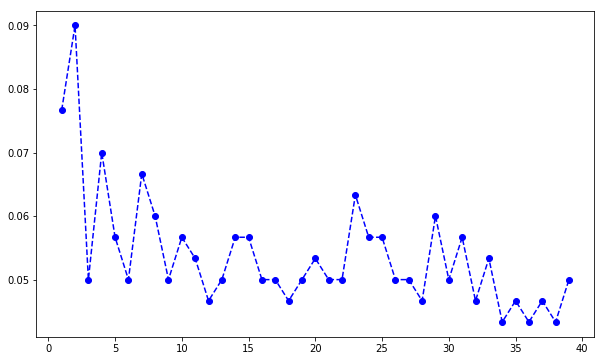

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')

In [60]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)

print("WITH K=1")
print("\n")
print(confusion_matrix(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]
